In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH_TRAIN_X = "../UCI_HAR_Dataset/train/X_train.txt"
PATH_TRAIN_Y = "../UCI_HAR_Dataset/train/y_train.txt"

PATH_TEST_X = "../UCI_HAR_Dataset/test/X_test.txt"
PATH_TEST_Y = "../UCI_HAR_Dataset/test/y_test.txt"

PATH_TRAIN_SBJ = "../UCI_HAR_Dataset/train/subject_train.txt"

PATH_TEST_SBJ = "../UCI_HAR_Dataset/test/subject_test.txt"

PATH_FT = "../UCI_HAR_Dataset/features.txt"
features = pd.read_csv(PATH_FT, sep=" ", header=None, index_col=0).reset_index()

In [3]:
# testing data
df_X_test = pd.read_fwf(PATH_TEST_X, header=None)
df_X_test.rename(columns=features[1], inplace=True)

df_y_test = pd.read_fwf(PATH_TEST_Y, header=None)

# training data
df_x_train = pd.read_fwf(PATH_TRAIN_X, header=None)
df_x_train.rename(columns=features[1], inplace=True)

y_train_col = pd.read_fwf(PATH_TRAIN_Y, header=None)

In [4]:
# DataFrames
X_df = pd.DataFrame(df_x_train)
y_df = pd.DataFrame(y_train_col)

In [5]:
# Convert DataFrames to numpy arrays
X = X_df.to_numpy()
y = y_df.to_numpy()

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes=7)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Define the model
model = Sequential([
    InputLayer(shape=(X_train.shape[1],)),
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # Ensure the number of units matches your classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
callbacks = [TensorBoard(log_dir='./logs')]

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=callbacks)

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6633 - loss: 0.8740
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8976 - loss: 0.2685
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9271 - loss: 0.2026
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1532
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.1236
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1382
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - loss: 0.1327
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1215
Epoch 9/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9522 - loss: 0.1231
Epoch 10/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9678 - loss: 0.0748
Epoch 11/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.0670
Epoch 12/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [8]:
# Evaluate the model with partial test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9900 - loss: 0.0326   
Test Accuracy: 0.99


In [9]:
X_df_test = pd.DataFrame(df_X_test)
y_df_test = pd.DataFrame(df_y_test)

# Convert DataFrames to numpy arrays
X_test_final = X_df_test.to_numpy()
y_test_final = y_df_test.to_numpy()

# One-hot encode the labels
y_test_final = tf.keras.utils.to_categorical(y_test_final, num_classes=7)

# Evaluate the model with final test
loss, accuracy = model.evaluate(X_test_final, y_test_final)
print(f"Test Accuracy: {accuracy:.2f}")

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.4365 - loss: 3.0584
Test Accuracy: 0.43


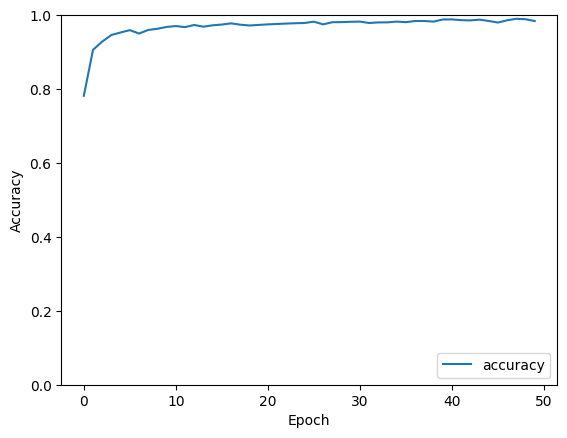

In [10]:
# Visualize training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()